## Import Libraries

In [1]:
import numpy as np
from scipy.ndimage import gaussian_filter
import pandas as pd
import matplotlib.pyplot as plt



## Load Data

In [7]:
eye_data = pd.read_csv('data/EyeTrackingData.csv')
fixations_data = pd.read_csv('data/eye_tracking/results/all_fixations.csv')
saccades_data = pd.read_csv('data/eye_tracking/results/all_saccades.csv')
print(eye_data.head())
print(fixations_data.head())
print(saccades_data.head())

   id  sessionId  timestamp LeftEyeValidity  LeftEyeX  LeftEyeY  \
0   1          1          9           Valid       957       565   
1   2          1         20           Valid       952       563   
2   3          1         31           Valid       955       569   
3   4          1         43           Valid       952       569   
4   5          1         53           Valid       951       566   

  RightEyeValidity  RightEyeX  RightEyeY  
0            Valid        947        509  
1            Valid        948        514  
2            Valid        949        512  
3            Valid        948        517  
4            Valid        943        511  
   Unnamed: 0   Start     End  Duration       X       Y  \
0         0.0    73.0   273.0     200.0   978.0   221.0   
1         1.0   295.0   872.0     577.0   956.0   205.0   
2         2.0  1005.0  1127.0     122.0  1019.0  1204.0   
3         3.0  1160.0  1283.0     123.0   927.0  1129.0   
4         4.0  1306.0  2005.0     699.0   90

## Scatter Plot

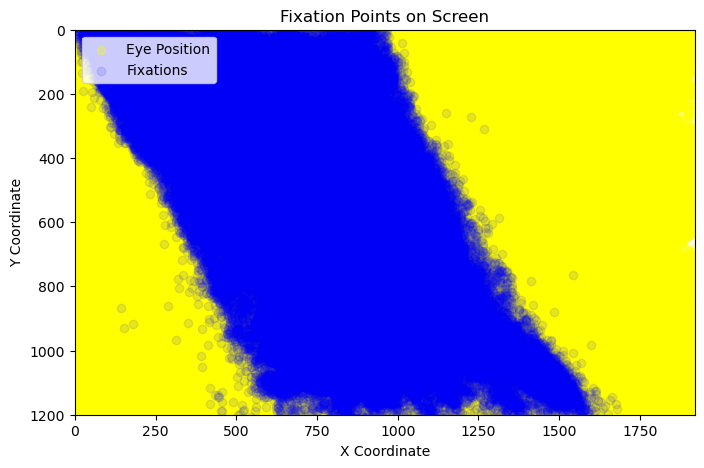

In [24]:
x_data = eye_data['LeftEyeX']
y_data = eye_data['LeftEyeY']
x_fixations = fixations_data['X']
y_fixations = fixations_data['Y']
plt.figure(figsize=(8, 5))
plt.xlim(0, 1920)
plt.ylim(0, 1200)

plt.scatter(x_data, y_data, alpha=0.3, color="yellow")
#for index, row in saccades_data.iterrows():
    #plt.plot([row['Start_X'], row['End_X']], [row['Start_Y'], row['End_Y']], color='blue', #alpha=0.05)
plt.scatter(x_fixations, y_fixations, alpha=0.1, color='blue')

plt.legend(['Eye Position', 'Fixations'], loc='upper left')

plt.title('Fixation Points on Screen')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# Inverting the y-axis to match the typical screen coordinates
plt.gca().invert_yaxis()

plt.show()

## Fixations Heatmap

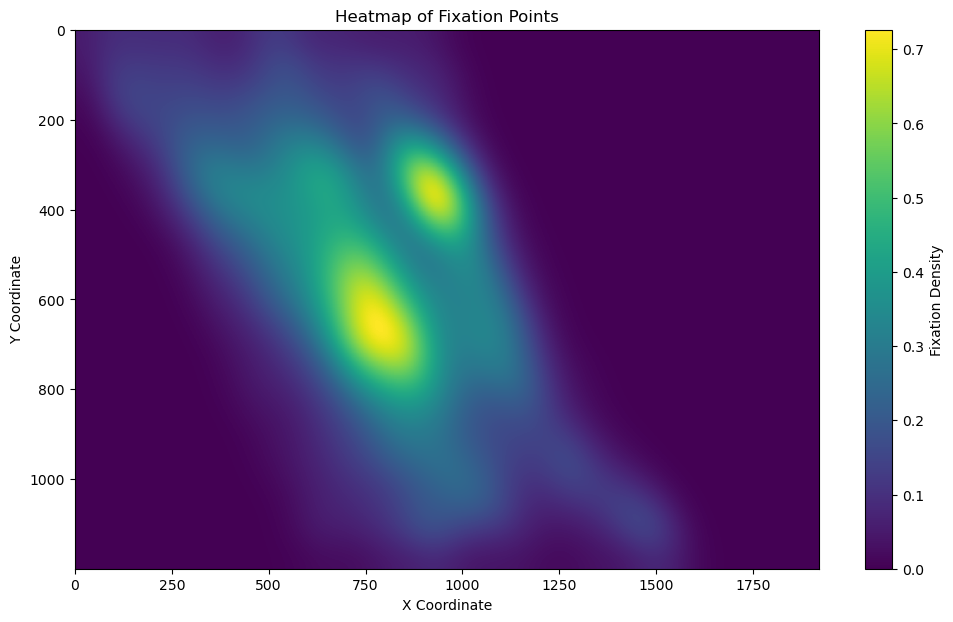

In [9]:

screen_width = 1920
screen_height = 1200
heatmap = np.zeros((screen_height, screen_width))

# Increment the heatmap values where fixations occur
for x, y in zip(fixations_data['X'], fixations_data['Y']):
    if 0 <= x < screen_width and 0 <= y < screen_height:
        heatmap[int(y), int(x)] += 1

sigma = 50  
blurred_heatmap = gaussian_filter(heatmap, sigma=sigma)

plt.figure(figsize=(8, 5))
plt.imshow(blurred_heatmap, cmap='viridis', interpolation='nearest', aspect='auto')
plt.colorbar(label='Fixation Density')
plt.title('Heatmap of Fixation Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()